In [1]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 29.8 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
from sklearn import datasets 
wine_data = datasets.load_wine(as_frame =True)
df = wine_data.data

In [4]:
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Text(0.5, 1.0, 'Mapa de Correlação')

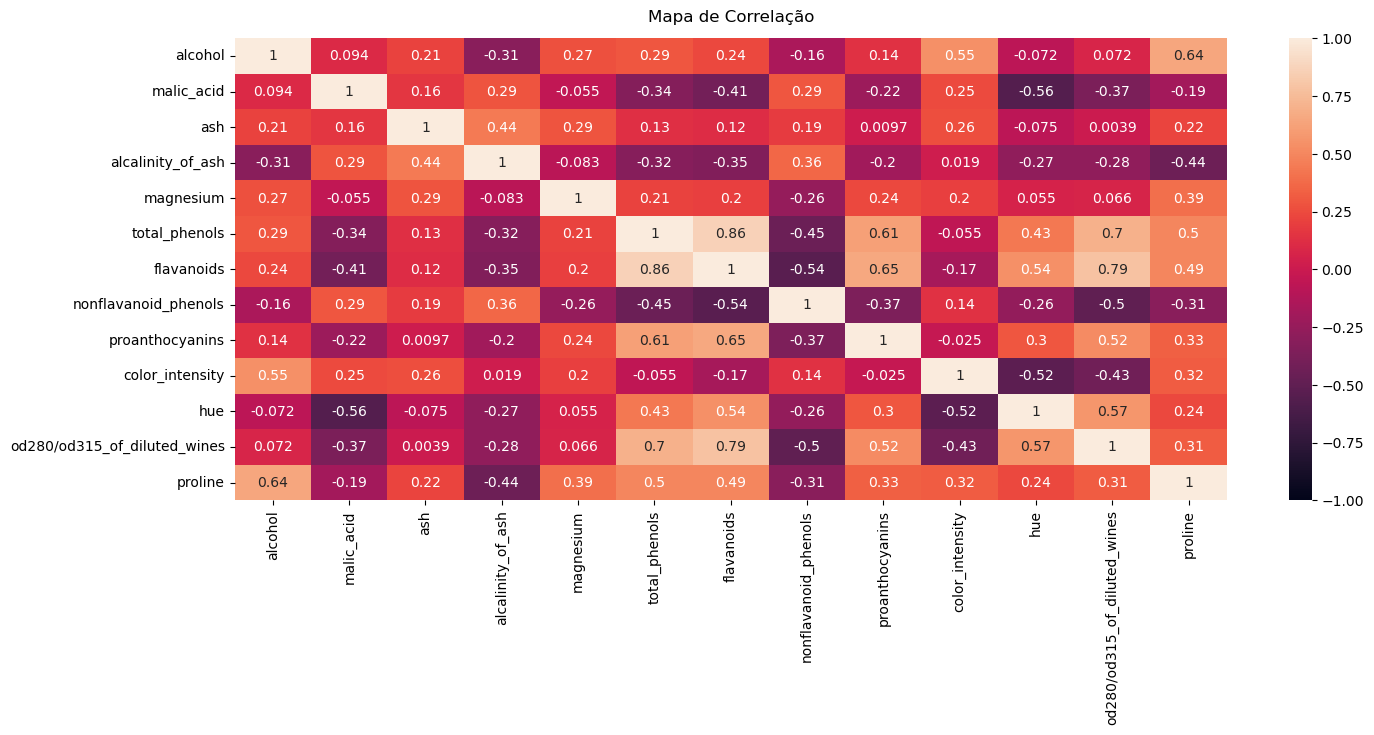

In [8]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title("Mapa de Correlação", fontdict={'fontsize': 12},pad=12) 

In [9]:
!pip install factor_analyzer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=b6165e89e2918fe5f811ff6b5fc49a933ae4b90e67e821a778140241ceeb946d
  Stored in directory: /home/jovyan/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [11]:
kmo_variaveis , kmo = calculate_kmo(df)

In [12]:
kmo

np.float64(0.778682120560652)

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [15]:
qui_quadrado , pvalor = calculate_bartlett_sphericity(df)

In [16]:
print(qui_quadrado)
print(pvalor)

1317.1808094724354
2.468617032427945e-224


In [18]:
pvalor < 0.05

np.True_

In [19]:
colunas_numericas = df.columns
colunas_numericas

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
padronizar = StandardScaler()
variaveis_numericas = padronizar.fit_transform(df)
variaveis_numericas

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [24]:
dados_padronizados = pd.DataFrame(variaveis_numericas, columns= colunas_numericas)
dados_padronizados

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [27]:
from sklearn.decomposition import PCA

In [28]:
n_fatores = dados_padronizados.shape[1]
n_fatores

13

In [29]:
pca = PCA(n_components = n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=13)

In [32]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [33]:
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'iframe'

In [36]:
fatores = [f'F{i+1}' for i in range(n_fatores) ]
print(fatores)

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']


In [38]:
fig = px.bar(x=fatores, y=pca.explained_variance_ratio_, text= np.around(pca.explained_variance_ratio_, decimals=2),title='Scree Plot')

In [40]:
fig = px.bar(x=fatores, y=pca.explained_variance_ratio_, text= np.around(pca.explained_variance_ratio_, decimals=2),title='Scree Plot')

fig.update_layout(yaxis= {'title':'Porcentagem de variância explicada', 'tickfont': { 'size': 15}},
                  xaxis= {'title': 'Fatores', 'tickfont': {'size': 15}},
                  title= {'font': {'size': 25}})
fig.show()
                  


In [43]:
variancia_acumulada =  [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[np.float64(0.36198848099926323),
 np.float64(0.5540633835693527),
 np.float64(0.6652996889318524),
 np.float64(0.7359899907589927),
 np.float64(0.8016229275554787),
 np.float64(0.8509811607477044),
 np.float64(0.8933679539739375),
 np.float64(0.9201754434577262),
 np.float64(0.9423969775056233),
 np.float64(0.9616971684450641),
 np.float64(0.9790655253449633),
 np.float64(0.9920478511010055),
 np.float64(1.0)]

In [44]:
fig = px.bar(x= fatores, y=variancia_acumulada, text=np.around(variancia_acumulada, decimals=2),
            title= 'Scree Plot')
fig.update_layout(yaxis= {'title':'Variancia Acumulada', 'tickfont': { 'size': 15}},
                  xaxis= {'title': 'Fatores', 'tickfont': {'size': 15}},
                  title= {'font': {'size': 25}})

## Calculando Autovalores

In [48]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

13.073446327683614
13.0


In [49]:
autovalores = pca.explained_variance_ratio_ * n_fatores

In [51]:
fatores_selecionados = ['Fator Selecionado' if autovalor > 1 else 'Fator Não Selecionado'for autovalor in autovalores]
fatores_selecionados

['Fator Selecionado',
 'Fator Selecionado',
 'Fator Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado',
 'Fator Não Selecionado']

In [52]:
fig = px.bar(x=fatores, y=autovalores, text = np.around(autovalores,decimals=2), title='Scree Plot', color=fatores_selecionados )

In [53]:
fig.update_layout(yaxis = {'title':'Quantidade de Variaveis Explicadas', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Autovalor', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

In [58]:
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variancia Explicada': pca.explained_variance_ratio_, 'Variacia Acumulada': variancia_acumulada })

In [59]:
resumo.head(13)

,Fator,Autovalor,Variancia Explicada,Variacia Acumulada
0,F1,4.705850,0.361988,0.361988
1,F2,2.496974,0.192075,0.554063
2,F3,1.446072,0.111236,0.665300
3,F4,0.918974,0.070690,0.735990
4,F5,0.853228,0.065633,0.801623
5,F6,0.641657,0.049358,0.850981
6,F7,0.551028,0.042387,0.893368
7,F8,0.348497,0.026807,0.920175
8,F9,0.288880,0.022222,0.942397
9,F10,0.250902,0.019300,0.961697


## Quando cada valor influcia na componente

In [63]:
pd.DataFrame(pca.components_, columns=colunas_numericas, index= [f'Autovetor{i+1}' for i in range(n_fatores)] )

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Autovetor1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
Autovetor2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
Autovetor3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
Autovetor4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
Autovetor5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
Autovetor6,0.213539,0.536814,0.154475,-0.100825,0.038144,-0.084122,-0.018920,-0.258594,-0.533795,-0.418644,0.105983,0.265851,0.119726
Autovetor7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
Autovetor8,0.396139,0.065827,-0.170260,0.427970,-0.156361,-0.405934,-0.187245,-0.233285,0.368227,-0.033797,0.436624,-0.078108,0.120023
Autovetor9,-0.508619,0.075283,0.307694,-0.200449,-0.271403,-0.286035,-0.049578,-0.195501,0.209145,-0.056218,-0.085828,-0.137227,0.575786
Autovetor10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


### Calculando as cargas fatoriais = Quanto a variável original influencia na compoente.

In [64]:
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([2.16929718, 1.58018155, 1.20252733, 0.95863128, 0.92370351,
       0.80103498, 0.74231281, 0.59033665, 0.53747553, 0.50090167,
       0.47517222, 0.41081655, 0.32152439])

In [66]:
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns=fatores, index=colunas_numericas)

In [67]:
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
alcohol,0.313093,0.764257,-0.249383,-0.017118,-0.245394,0.171052,-0.041864,0.233856,-0.273370,0.105993,-0.107349,-0.109395,0.004813
malic_acid,-0.531885,0.355432,0.107040,0.514680,0.032527,0.430007,0.312160,0.038860,0.040463,-0.154819,0.036344,0.049995,0.008348
ash,-0.004449,0.499446,0.753051,-0.205315,-0.132113,0.123740,-0.110731,-0.100511,0.165378,-0.013587,-0.236964,-0.020386,-0.045405
alcalinity_of_ash,-0.519157,-0.016735,0.736043,0.058342,0.061060,-0.080764,-0.213021,0.252646,-0.107737,0.026447,0.227757,-0.022900,0.029478
magnesium,0.308023,0.473476,0.157239,-0.337243,0.671577,0.030555,0.239680,-0.092306,-0.145872,0.033996,0.033875,0.025561,0.018254
total_phenols,0.856137,0.102774,0.175784,0.189875,-0.137926,-0.067385,-0.020729,-0.239638,-0.153737,-0.160354,0.144614,-0.124840,-0.149158
flavanoids,0.917470,-0.005309,0.181199,0.145995,-0.100708,-0.015156,-0.045047,-0.110538,-0.026647,-0.081722,-0.012209,-0.017624,0.267591
nonflavanoid_phenols,-0.647607,0.045477,0.204872,-0.194891,-0.462501,-0.207143,0.442008,-0.137716,-0.105077,0.107962,0.055546,0.017399,0.036667
proanthocyanins,0.679922,0.062104,0.179723,0.382548,0.126418,-0.427589,0.276244,0.217378,0.112410,0.067213,-0.112788,-0.039255,-0.037592
color_intensity,-0.192236,0.837489,-0.165114,0.063198,-0.070605,-0.335349,-0.169034,-0.019952,-0.030216,-0.145650,0.015129,0.248224,-0.003856


In [69]:
resumo_cargas_fatoriais = cargas_fatoriais[['F1','F2','F3']].copy()
resumo_cargas_fatoriais 

,F1,F2,F3
alcohol,0.313093,0.764257,-0.249383
malic_acid,-0.531885,0.355432,0.107040
ash,-0.004449,0.499446,0.753051
alcalinity_of_ash,-0.519157,-0.016735,0.736043
magnesium,0.308023,0.473476,0.157239
total_phenols,0.856137,0.102774,0.175784
flavanoids,0.917470,-0.005309,0.181199
nonflavanoid_phenols,-0.647607,0.045477,0.204872
proanthocyanins,0.679922,0.062104,0.179723
color_intensity,-0.192236,0.837489,-0.165114


In [70]:
fig = px.scatter_3d(cargas_fatoriais, x='F1', y='F2', z='F3', text=cargas_fatoriais.index)
fig.update_traces(textposition= 'top center')
fig.show()

## Scores Fatoriais = Projeções dos dados originais dos compoentes princiais

In [71]:
scores_fatoriais = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    scores_fatoriais[i] = pca.components_[i] / raiz_autovalores[i]

In [74]:
pca.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [75]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F1 = scores_fatoriais[0][indice] * dados_padronizados[variavel]

In [78]:
F2 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F2 = scores_fatoriais[1][indice] * dados_padronizados[variavel]

In [79]:
F3 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F3 = scores_fatoriais[2][indice] * dados_padronizados[variavel]

In [80]:
df['F1'] = F1
df['F2'] = F2
df['F3'] = F3


In [99]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,F1,F2,F3,Rankins,Rankigns,Rankings
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,-0.106771,0.233929,-0.106771,-0.005595,-0.005595,-0.005595
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,-0.101736,0.222898,-0.101736,-0.005331,-0.005331,-0.005331
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,-0.147048,0.322174,-0.147048,-0.007705,-0.007705,-0.007705
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,-0.246063,0.539111,-0.246063,-0.012894,-0.012894,-0.012894
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.003992,-0.008746,0.003992,0.000209,0.000209,0.000209


In [102]:
df['Rankings'] = df['F1'] * pca.explained_variance_ratio_[0] +  df['F2'] * pca.explained_variance_ratio_[1] +  df['F3'] * pca.explained_variance_ratio_[2]  

In [101]:
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,F1,F2,F3,Rankins,Rankigns,Rankings
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,-0.106771,0.233929,-0.106771,-0.005595,-0.005595,-0.005595
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,-0.101736,0.222898,-0.101736,-0.005331,-0.005331,-0.005331
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,-0.147048,0.322174,-0.147048,-0.007705,-0.007705,-0.007705
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,-0.246063,0.539111,-0.246063,-0.012894,-0.012894,-0.012894
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.003992,-0.008746,0.003992,0.000209,0.000209,0.000209


In [104]:
df.sort_values('Rankings', ascending = False).head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,F1,F2,F3,Rankins,Rankigns,Rankings,Rankings
80,12.00,0.92,2.00,19.0,86.0,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278.0,0.157381,-0.344814,0.157381,0.008247,0.008247,0.008247,0.008247
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0,0.153354,-0.335989,0.153354,0.008036,0.008036,0.008036,0.008036
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0,0.145969,-0.319811,0.145969,0.007649,0.007649,0.007649,0.007649
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,0.144963,-0.317605,0.144963,0.007596,0.007596,0.007596,0.007596
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,0.141606,-0.310251,0.141606,0.007420,0.007420,0.007420,0.007420


In [105]:
fig = px.scatter_3d(df.head(5), x = 'F1', y = 'F2', z='F3', text = df.head(5).index)
fig.update_traces(textposition = 'top center')
fig.show()